In [94]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
#import seaborn as sbn
from krisj import plotting
import colorsys

In [2]:
%matplotlib inline

In [3]:
data_dir = "../Results/1/"

In [281]:
result_files = [
    #"0_results.json",
    #"3_results.json",
    "4_results.json",
    #"1-4_results.json",
    #"0-4_results.json",
    #"1_results.json",
    #"0-1_results.json",
    #"0-1-2_results.json",
    #"0-1-2-3_results.json",
    #"0-1-2-3-4_results.json",
]

result_files_wo_coupling = [
    #"0_nocoupling_results.json",
    "4_nocoupling_results.json",
    #"0-4_nocoupling_results.json"
]

shuffled_result_files = [
    "0_shuffle_results.json",
    "4_shuffle_results.json",
    "0-4_shuffle_results.json"
]

In [273]:
def single_color_range(n, h, s):
    return [
        plotting.generate_hex_string(*colorsys.hls_to_rgb(h, l, s))
        for l in np.linspace(0.4, 1, n, endpoint=False)
    ]

def plot_results(file_list):

    data = []
    for f in file_list:
        with open(data_dir + f) as infile:
            data.append(json.load(infile))

    dat = [{aa: max((di["best_bac"]) for di in d[aa]) for aa in d} for d in data]

    df = pd.DataFrame(dat)
    df = df[sorted(df)]
    df = df.transpose()
    df.columns = [n.split(".")[0] for n in file_list]

    ax = df.plot(
        kind="bar",
        figsize=[14, 7],
        alpha=0.8,
        width=0.7,
        #color=["#5575ff", "#4565cf", "#3555af"],
        color=single_color_range(len(file_list), 0.66, 0.6),
        linewidth=1,
        edgecolor="white",
    )
    plt.plot([-0.5, 19.5], [0.5, 0.5], "k--", zorder=0)

    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    plt.yticks(np.arange(0, 1.01, 0.1)[1:])
    plt.xticks(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.set_xticklabels([aa.capitalize() for aa in sorted(df.index)])


    plt.ylim([0., 1])


    plt.ylabel("Balanced accuracy", fontsize=22)

    ax.grid(which="major", axis="y", alpha=0.5, zorder=-20)
    print(df.values.mean())


0.786973486264


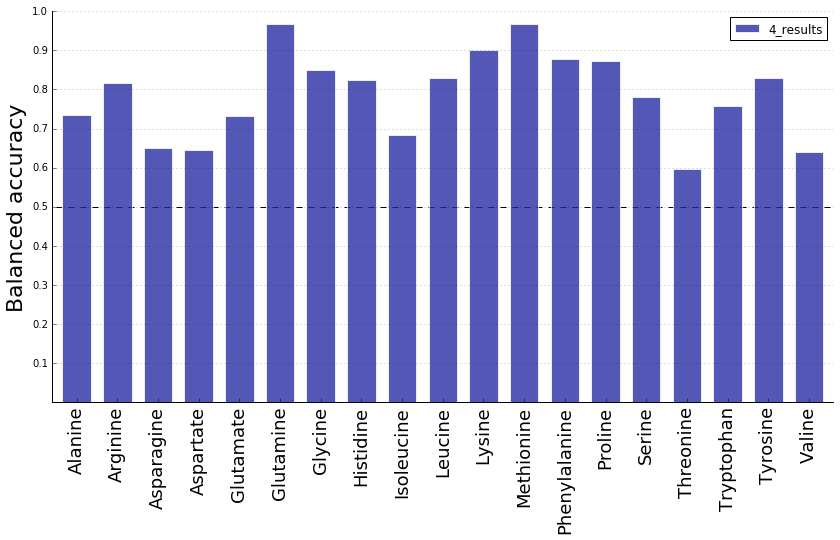

In [279]:
plot_results(result_files)

0.729133214503


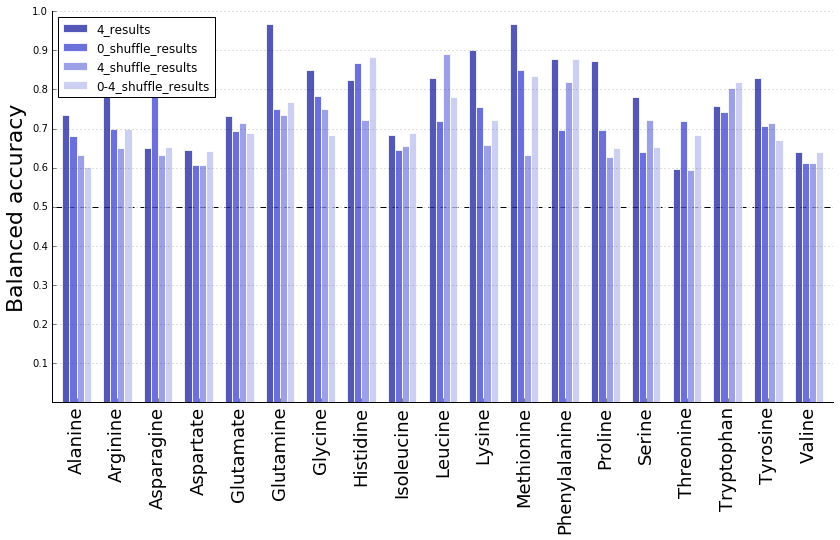

In [284]:
plot_results(result_files + shuffled_result_files)

In [229]:
data = []
for f in result_files:
    with open(data_dir + f) as infile:
        data.append(json.load(infile))

In [230]:
dat = [{aa: max((di["best_bac"]) for di in d[aa]) for aa in d} for d in data]

In [231]:
df = pd.DataFrame(dat)
df = df[sorted(df)]
df = df.transpose()
df.columns = [n.split("_")[0] for n in result_files]

In [341]:
single_color_range(4, 0.66, 0.6)

['#282da3', '#474cd1', '#8488e0', '#c1c3ef']

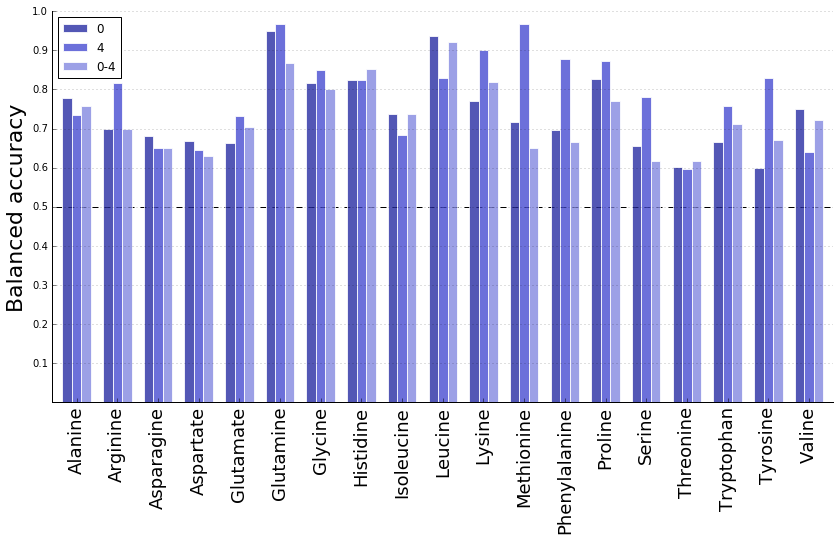

In [233]:
ax = df.plot(
    kind="bar",
    figsize=[14, 7],
    alpha=0.8,
    width=0.7,
    #color=["#5575ff", "#4565cf", "#3555af"],
    color=single_color_range(4, 0.66, 0.6),
    linewidth=1,
    edgecolor="white",
)
plt.plot([-0.5, 19.5], [0.5, 0.5], "k--", zorder=0)

plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])
plt.yticks(np.arange(0, 1.01, 0.1)[1:])
plt.xticks(fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xticklabels([aa.capitalize() for aa in sorted(df.index)])


plt.ylim([0., 1])


plt.ylabel("Balanced accuracy", fontsize=22)

ax.grid(which="major", axis="y", alpha=0.5, zorder=-20)

None

Internal in network
Specific cases - genes that are(n't) predicted
Summary of predictability by pathway
Does the coupling network help?

In [301]:
def make_plot(df):
    ax = df.plot(
        kind="bar",
        figsize=[14, 7],
        alpha=0.8,
        width=0.7,
        #color=["#5575ff", "#4565cf", "#3555af"],
        color=single_color_range(4, 0.66, 0.6),
        linewidth=1,
        edgecolor="white",
    )
    plt.plot([-0.5, 19.5], [0.5, 0.5], "k--", zorder=0)

    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    plt.yticks(np.arange(0, 1.01, 0.1)[1:])
    plt.xticks(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.set_xticklabels([aa.capitalize() for aa in sorted(df.index)])


    plt.ylim([0., 1])


    plt.ylabel("Balanced accuracy", fontsize=22)

    ax.grid(which="major", axis="y", alpha=0.5, zorder=-20)

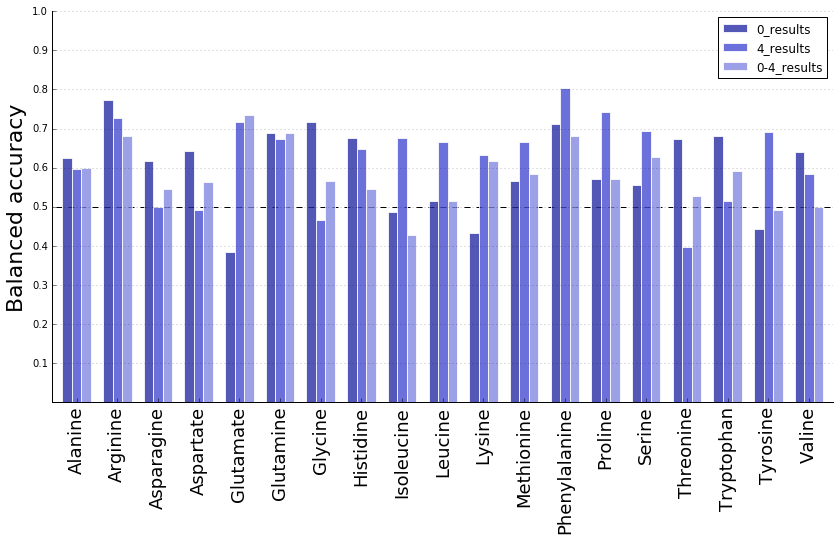

In [302]:
make_plot(df)

In [334]:
data_dir_2 = "../Results/3/"

results_2 = [
    "0_results.json",
    #"4_results.json",
    #"0-4_results.json"
]

shuffled_results_2 = [
    "0_shuffle_results.json",
    #"4_shuffle_results.json",
    #"0-4_shuffle_results.json"
]

shared_results_2 = [
    "0_shared_results.json",
    #"4_shared_results.json",
    #"0-4_shared_results.json"
]

shuffle_shared_2 = [
    #"0_shuffle_shared_results.json",
    "4_shuffle_shared_results.json",
    #"0-4_shuffle_shared_results.json"
]

In [335]:
def make_df(res_list):
    dat = []
    for f in res_list:
        with open(data_dir_2 + f) as infile:
            js = json.load(infile)
            best_bacs = np.array([r["best_bac"] for r in js])
            best_i = best_bacs.argmax()
            dat.append(js[best_i]["best_epoch_bacs"])
            #print(js["best_bac"])

    df = pd.DataFrame(dat, index=[f.split(".")[0] for f in res_list]).transpose()
    return df

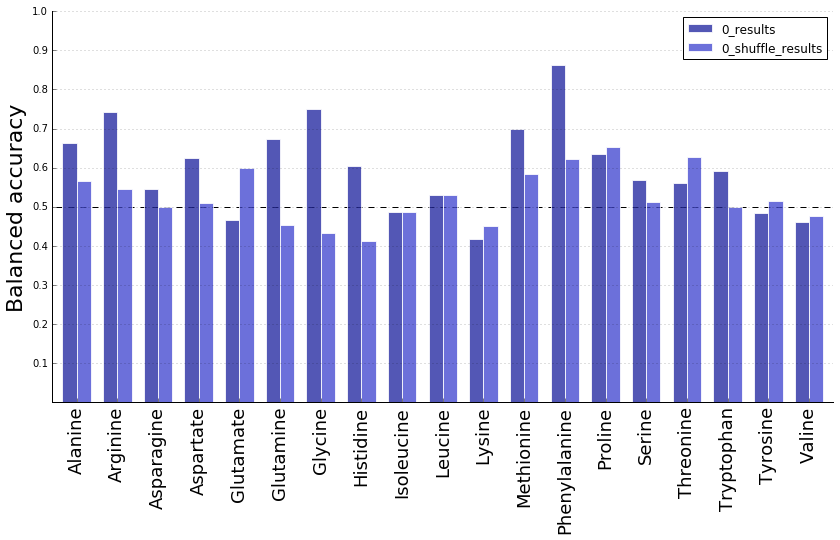

In [338]:
df = make_df(results_2 + shuffled_results_2)
make_plot(df)

In [344]:
df = make_df(shared_results_2)
make_plot(df)

FileNotFoundError: [Errno 2] No such file or directory: '../Results/3/0_shared_results.json'

In [326]:
with open(data_dir_2 + "0_results.json") as infile:
    js = json.load(infile)

In [327]:
max(r["best_"])

[{'best_bac': 0.5979633432200231,
  'best_epoch': 10,
  'best_epoch_bacs': {'alanine': 0.661904761904762,
   'arginine': 0.7424242424242424,
   'asparagine': 0.5446428571428572,
   'aspartate': 0.625,
   'glutamate': 0.4666666666666667,
   'glutamine': 0.671875,
   'glycine': 0.75,
   'histidine': 0.6029411764705883,
   'isoleucine': 0.4852941176470588,
   'leucine': 0.5303030303030303,
   'lysine': 0.41666666666666663,
   'methionine': 0.7,
   'phenylalanine': 0.8636363636363636,
   'proline': 0.6339285714285714,
   'serine': 0.5690909090909091,
   'threonine': 0.5615384615384615,
   'tryptophan': 0.5909090909090909,
   'tyrosine': 0.48461538461538467,
   'valine': 0.459866220735786}},
 {'best_bac': 0.5659536951472273,
  'best_epoch': 2,
  'best_epoch_bacs': {'alanine': 0.5761904761904761,
   'arginine': 0.6363636363636364,
   'asparagine': 0.5267857142857143,
   'aspartate': 0.4732142857142857,
   'glutamate': 0.5,
   'glutamine': 0.65625,
   'glycine': 0.65,
   'histidine': 0.5,
   

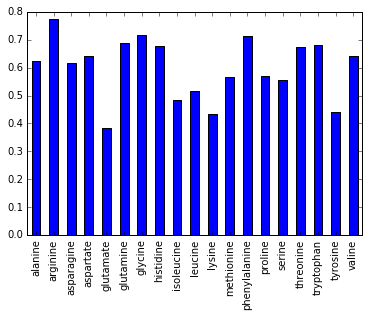

In [299]:
df.iloc[:, 0].plot(kind="bar")